In [17]:
#importando as imagens
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

fashion = 1

if fashion == 0:
  # modelo de predição é geral, só tem que mudar entrada de dados e o label
  fashion_mnist = tf.keras.datasets.mnist
  labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9'
    }
else:
    labels = {
      0: 'T-shirt/top',
      1: 'Trouser',
      2: 'Pullover',
      3: 'Dress',
      4: 'Coat',
      5: 'Sandal',
      6: 'Shirt',
      7: 'Sneaker',
      8: 'Bag',
      9: 'Ankle boot'
  }

# Carregar o dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Achatar as imagens 28x28 para uma matriz com 784 colunas (28*28 = 784)
train_images_flat = train_images.reshape(train_images.shape[0], 28*28)
test_images_flat = test_images.reshape(test_images.shape[0], 28*28)

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images_flat = train_images_flat / 255.0
test_images_flat = test_images_flat / 255.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [19]:
class NeuralNetwork: #duvida -> será que inicio com uma array só? camada input, camada escondida e camada final tudo no mesmo?
    #classe que recebe as caracteristicas das camadas e cria os objetos
    def __init__ (self, images_train, labels_train, cam_escondida, cam_final, index_image): #cam_escondida = array que tem qnt neuronios das camadas = [10, 10] = 2 camadas com 10 neuronios
        self.index_image = index_image
        self.camada_input_valor = images_train[self.index_image] #camada de input já direta (não é tamanho, é a camada inteira mesmo)
        self.cam_escondida = cam_escondida #array com os tamanhos camadas hiddens
        self.cam_final = cam_final #tamanho da camada final
        self.cost_std = np.zeros(10)
        self.cost_std[labels_train[self.index_image]] = 1
        self.number_loops = len(self.cam_escondida) # 1
        self.images_train = images_train
        self.labels_train = labels_train

    def updateImage(self, index_image):
      self.index_image = index_image
      self.camada_input_valor = self.images_train[self.index_image]
      self.cost_std = np.zeros(10)
      self.cost_std[self.labels_train[self.index_image]] = 1

    def initiateNN(self):
      self.camada_pesos = []
      self.camada_bias = []   #gera as listas das camadas (lista de vetores)
      self.camada_valores = []

      self.camada_input_pesos = np.random.randn(self.cam_escondida[0], self.camada_input_valor.shape[0]) #gera os pesos do input
      self.camada_final_valor = np.zeros((self.cam_final,1)) #gera os valores finais

      for i in range(len(self.cam_escondida)):
        if(i != len(self.cam_escondida)-1): #2 camada à penultima camada
          self.camada_pesos.append(np.random.randn(self.cam_escondida[i+1], self.cam_escondida[i]))
          self.camada_bias.append(np.zeros(self.cam_escondida[i]))
          self.camada_valores.append(np.zeros((self.cam_escondida[i],1)))

        else: #ultima camada
          self.camada_pesos.append(np.random.randn(self.cam_final, self.cam_escondida[i]))
          self.camada_bias.append(np.zeros(self.cam_escondida[i]))
          self.camada_valores.append(np.zeros((self.cam_escondida[i],1)))

    def print_camadas(self):
        # Shape do valor da camada inicial
        print(f"Input Valor: {self.camada_input_valor.shape}")
        # Shape do peso da camada inicial
        print(f"Input Peso: {self.camada_input_pesos.shape}")

        # Iterar sobre as camadas intermediárias
        for i in range(0, len(self.cam_escondida)):
            print(f"Valor Camada Escondida {i}: {self.camada_valores[i].shape}")
            print(f"Peso Camada Escondida {i}: {self.camada_pesos[i].shape}")
            print(f"Bias Camada Escondida {i}: {self.camada_bias[i].shape}")

        # Shape do valor da camada final
        print(f"Resultado Valor: {self.camada_final_valor.shape}")
        print("\n")


    def fPropagation(self):
      #print("Quantidade de Loop: ", self.number_loops)
      for i in range(self.number_loops + 1): #tem que adicionar 1, range não inclui o último indice
        #camada2_valor = sigmoid(np.dot(camada1_pesos, camada1_valor) + camada2_bias)
        #camada3_valor = sigmoid(np.dot(camada2_pesos, camada2_valor))
        if(i == 0 and i < self.number_loops):
          self.camada_valores[i] = sigmoid(np.dot(self.camada_input_pesos, self.camada_input_valor) + self.camada_bias[i])
          #print("Indice: ", i)
        elif (i != 0 and i < self.number_loops):
          self.camada_valores[i] = sigmoid(np.dot(self.camada_pesos[i-1], self.camada_valores[i-1]) + self.camada_bias[i])
          #print("Indice: ", i)
        elif (i == self.number_loops):
          self.camada_final_valor = sigmoid(np.dot(self.camada_pesos[i-1], self.camada_valores[i-1]))
          #print("Indice: ", i)
          #print("Chegou no final da Forward Propagation\n")

    def costFunc(self):
        cost = np.sum(np.power((self.camada_final_valor - self.cost_std),2))
        return cost

    #recebe o objeto atual e retorna o gradiente daquela imagem
    #o vetor gradiente está salvando as modificações da direita para esquerda: camada inicial <- camada final
    #vetor gradiente = matriz que multiplica pelo learning rate e soma no peso

    def bPropagation(self):

        gradiente_pesos = []
        gradiente_bias = []

        delta_o = self.camada_final_valor - self.cost_std

        for i in reversed(range(len(self.cam_escondida))):
          #vai pegar a ultima camada e continuar
          if i == self.number_loops-1: #se for a ultima hidden layer -> atualiza os pesos com base no delta_o
            delta_h = delta_o #* sigmoid_derivative(self.camada_final_valor)#sigmoid da camada final = 1
            #esse aqui nao calcula o bias (a camada final nao tem bias)
            #print(i, " - ", delta_h.shape)

          elif i != self.number_loops-1: #enquanto não for a ultima hidden layer e nem a primeira
            delta_h = np.dot(self.camada_pesos[i+1].T, delta_h) * sigmoid_derivative(self.camada_valores[i+1])
            gradiente_bias.insert(0,delta_h)
            #print(i, " - ", delta_h.shape)

          vetor_gradiente = np.outer(delta_h, self.camada_valores[i])
          gradiente_pesos.insert(0,vetor_gradiente)

        delta_h = np.dot(self.camada_pesos[0].T, delta_h) * sigmoid_derivative(self.camada_valores[0])
        gradiente_bias.insert(0,delta_h)
        #print(i, " - ", sigmoid_derivative(self.camada_input_valor).shape)
        vetor_gradiente = np.outer(delta_h, self.camada_input_valor)
        gradiente_pesos.insert(0,vetor_gradiente) #ja adiciona na lista e pula o resto da iteração

      # Exibir as formas dos gradientes de pesos
        # print(len(self.gradiente_pesos))
        # for i in range(len(self.gradiente_pesos)):
        #     print("Gradiente Pesos: ", self.gradiente_pesos[i].shape)
        # print(len(self.gradiente_bias))
        # for i in range(len(self.gradiente_bias)):
        #     print("Gradiente Bias: \n", self.gradiente_bias[i].shape)

        return gradiente_pesos, gradiente_bias #PRECISO DISSO PARA CALCULAR A MÉDIA DOS GRADIENTES
        #media dos gradientes é calculado no LOOP PRINCIPAL

    def updateWeights(self, learning_rate, gradiente_pesos): #recebe o gradiente médio do batch dos pesos -> atualiza o peso da rede neural com base no learning rate
      self.camada_input_pesos = self.camada_input_pesos - learning_rate * gradiente_pesos[0]
      for i in range(len(gradiente_pesos)):
        if i == 0: #se é o primeiro
          self.camada_input_pesos = self.camada_input_pesos - learning_rate * gradiente_pesos[i]
        else:
          self.camada_pesos[i-1] = self.camada_pesos[i-1] - learning_rate * gradiente_pesos[i]

    def updateBias(self, learning_rate, gradiente_bias): #recebe o gradiente médio do batch dos bias -> atualiza o bias da rede neural com base no learning rate
      #void que só atualiza os bias da rede neural, não retorna nada
      for i in range(len(self.camada_bias)):
          self.camada_bias[i] = self.camada_bias[i] - learning_rate * gradiente_bias[i]

    def embaralhar_dados(self):
      indices = np.random.permutation(self.images_train.shape[0])

      # Aplicar a permutação às imagens e labels
      self.images_train = self.images_train[indices]
      self.labels_train = self.labels_train[indices]

    def updateImageTest(self, test_images, index_image):
      self.camada_input_valor = test_images[index_image]

    def testeModelo(self, test_images, test_labels):

      qnt_certos = 0

      for i in range(len(test_images)):
        self.updateImageTest(test_images, i)
        self.fPropagation()
        indice_max = np.argmax(self.camada_final_valor)
        if indice_max == test_labels[i]:
          qnt_certos += 1

      return qnt_certos/len(test_images) * 100


    def preverImagem(self, test_images, test_labels, index):
      self.updateImageTest(test_images, index)
      self.fPropagation()
      indice_max = np.argmax(self.camada_final_valor)

      if(indice_max == test_labels[index]):
        print("Correto: ", "\nPrevisto: ",labels[indice_max], "\nEsperado: ", labels[test_labels[index]])
      else:
        print("Incorreto: ", "\nPrevisto: ",labels[indice_max], "\nEsperado: ", labels[test_labels[index]])

      img_reshaped = test_images[index].reshape(28, 28)

      # Exibe a imagem utilizando o matplotlib
      plt.imshow(img_reshaped, cmap='gray')
      plt.show()

    def copy(self):
      # Faz uma cópia profunda do objeto atual
        copia_rede = NeuralNetwork(
            self.images_train,
            self.labels_train,
            copy.deepcopy(self.cam_escondida),
            copy.deepcopy(self.cam_final),
            self.index_image
        )
        # Copia todos os atributos necessários
        copia_rede.camada_input_valor = copy.deepcopy(self.camada_input_valor)
        copia_rede.camada_pesos = copy.deepcopy(self.camada_pesos)
        copia_rede.camada_bias = copy.deepcopy(self.camada_bias)
        copia_rede.camada_valores = copy.deepcopy(self.camada_valores)
        copia_rede.camada_input_pesos = copy.deepcopy(self.camada_input_pesos)
        copia_rede.camada_final_valor = copy.deepcopy(self.camada_final_valor)
        copia_rede.cost_std = copy.deepcopy(self.cost_std)

        return copia_rede

    def verCamadaHidden(self):
      for i in range(self.camada_input_pesos.shape[0]):
        aux_image = self.camada_input_pesos[i].reshape(28, 28)

        # Exibe a imagem utilizando o matplotlib
        plt.imshow(aux_image, cmap='gray')
        plt.show()

In [20]:
def soma_gradiente(pesoMedio, biasMedio, pesoNovo, biasNovo):
  pesoMedioAtualizado = []
  biasMedioAtualizado = []

  for i in range(len(pesoMedio)):
    auxMedio = np.array(pesoMedio[i])
    auxNovo = np.array(pesoNovo[i])
    auxresult = auxMedio + auxNovo
    pesoMedioAtualizado.append(auxresult)
  for i in range(len(biasMedio)):
    auxMedio = np.array(biasMedio[i])
    auxNovo = np.array(biasNovo[i])
    auxresult = auxMedio + auxNovo
    biasMedioAtualizado.append(auxresult)

  return pesoMedioAtualizado, biasMedioAtualizado


In [21]:
def media_gradiente(gradientePeso, gradienteBias, batch_size):
  mediaGradientePeso = []
  mediaGradienteBias = []

  for i in range(len(gradientePeso)):
    auxMedio = np.array(gradientePeso[i])
    auxresult = auxMedio/batch_size
    mediaGradientePeso.append(auxresult)

  for i in range(len(gradienteBias)):
    auxMedio = np.array(gradienteBias[i])
    auxresult = auxMedio/batch_size
    mediaGradienteBias.append(auxresult)

  return mediaGradientePeso, mediaGradienteBias

In [22]:
def treinarRede(redeNeural, learning_rate, batch_size, epocas, test_images, test_labels):
    # Inicializando a rede neural
    lista_precisao = []
    melhor_modelo = 0
    redeNeural.initiateNN()

    for i in range(epocas): # Quantidade de épocas

        redeNeural.embaralhar_dados()
        redeNeural.updateImage(0)
        redeNeural.fPropagation()

        if i == 0:
          print("Custo Inicial: ",redeNeural.costFunc())
          lista_precisao.append(redeNeural.testeModelo(test_images, test_labels))

        aux_index = 0  # Reinicia o índice auxiliar para cada época

        for k in range(len(redeNeural.images_train) // batch_size):
            # Inicializa os gradientes com o primeiro exemplo do batch
            redeNeural.updateImage(aux_index)
            pesoMedio, biasMedio = redeNeural.bPropagation()  # -> lista de ndarray

            for j in range(1, batch_size):  # Para o restante do batch
                redeNeural.updateImage(j + aux_index)
                redeNeural.fPropagation()
                pesoNovo, biasNovo = redeNeural.bPropagation()
                pesoMedio, biasMedio = soma_gradiente(pesoMedio, biasMedio, pesoNovo, biasNovo)  # Soma gradientes

            # Calcula o gradiente médio para o batch
            gradientePeso, gradienteBias = media_gradiente(pesoMedio, biasMedio, batch_size)
            redeNeural.updateWeights(learning_rate, gradientePeso)  # Atualiza pesos
            redeNeural.updateBias(learning_rate, gradienteBias)  # Atualiza bias
            redeNeural.fPropagation()

            aux_index += batch_size  # Atualiza o índice para o próximo batch

        # Realiza propagação após a atualização dos pesos e bias
        print(f'Época {i + 1}/{epocas}, Custo: {redeNeural.costFunc()}')
        lista_precisao.append(redeNeural.testeModelo(test_images, test_labels))
        print(f'Época {i + 1}/{epocas}, Precisão: {lista_precisao[i+1]}')

        if(lista_precisao[i+1] > melhor_modelo):
          melhor_modelo = lista_precisao[i+1]
          modelo_temp = redeNeural.copy()

    return lista_precisao, modelo_temp

In [23]:
rede1 = NeuralNetwork(train_images_flat, train_labels,[16,16],10,0)
lista_precisao, melhor_modelo = treinarRede(rede1,0.6, 16, 10, test_images_flat, test_labels)

Custo Inicial:  2.9109216223967493
Época 1/10, Custo: 0.1594798896773074
Época 1/10, Precisão: 76.99000000000001
Época 2/10, Custo: 0.0025489367959463357
Época 2/10, Precisão: 80.41
Época 3/10, Custo: 0.0787286402366437
Época 3/10, Precisão: 79.46
Época 4/10, Custo: 0.046107044548136904
Época 4/10, Precisão: 82.04
Época 5/10, Custo: 0.0909352188681875
Época 5/10, Precisão: 78.13
Época 6/10, Custo: 0.0035736397449721677
Época 6/10, Precisão: 82.15
Época 7/10, Custo: 0.023262959747721444
Época 7/10, Precisão: 82.02000000000001
Época 8/10, Custo: 0.016240448765228045
Época 8/10, Precisão: 82.25
Época 9/10, Custo: 0.004139931168422282
Época 9/10, Precisão: 82.33
Época 10/10, Custo: 0.027652402973505314
Época 10/10, Precisão: 83.53


Correto:  
Previsto:  Bag 
Esperado:  Bag


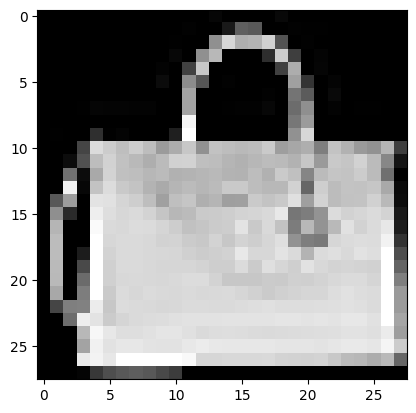

Correto:  
Previsto:  Bag 
Esperado:  Bag


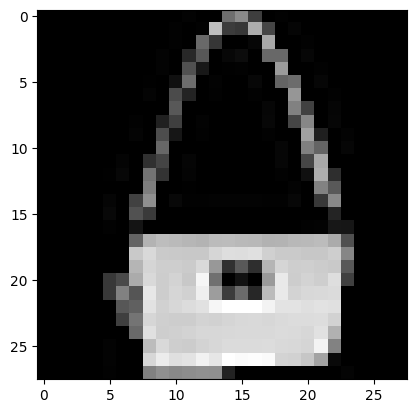

Correto:  
Previsto:  Dress 
Esperado:  Dress


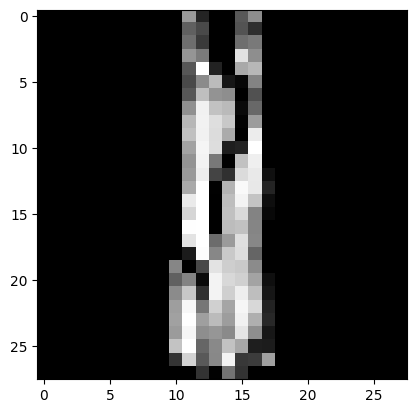

Correto:  
Previsto:  Dress 
Esperado:  Dress


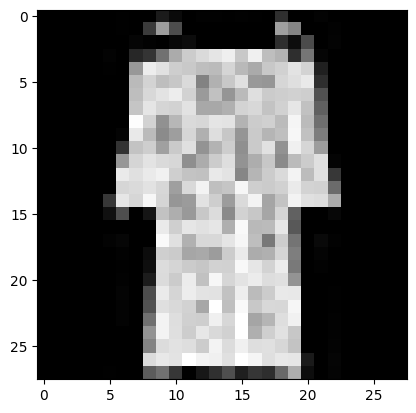

Correto:  
Previsto:  Bag 
Esperado:  Bag


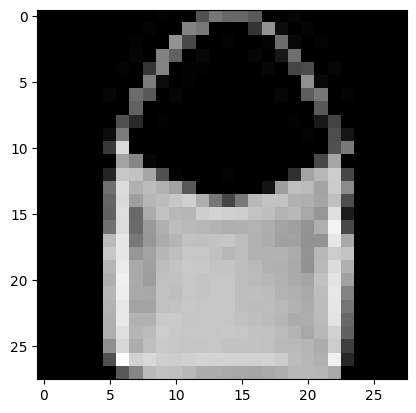

In [24]:
for i in range(30,35):
  rede1.preverImagem(test_images_flat, test_labels, i)

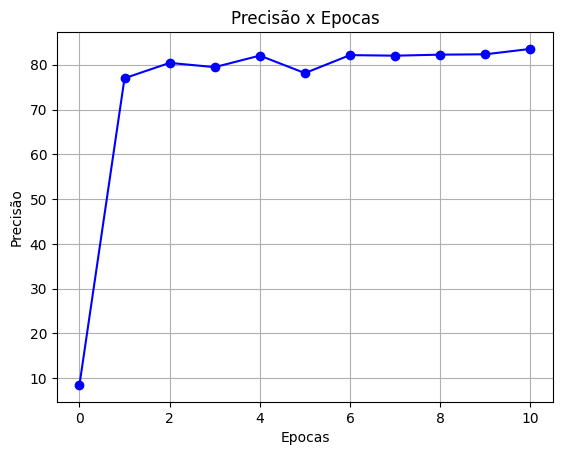

In [25]:
indices = list(range(len(lista_precisao)))

# Criando o gráfico
plt.plot(indices, lista_precisao, marker='o', linestyle='-', color='b')

# Adicionando título e rótulos
plt.title('Precisão x Epocas')
plt.xlabel('Epocas')
plt.ylabel('Precisão')

# Mostrando a grade
plt.grid()

# Exibindo o gráfico
plt.show()

83.53


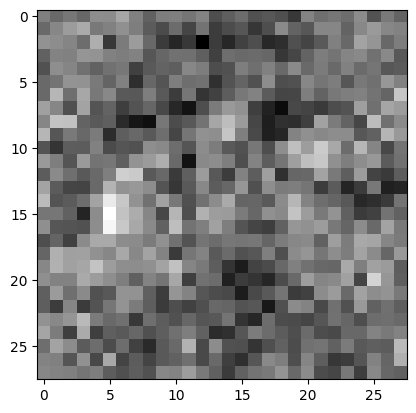

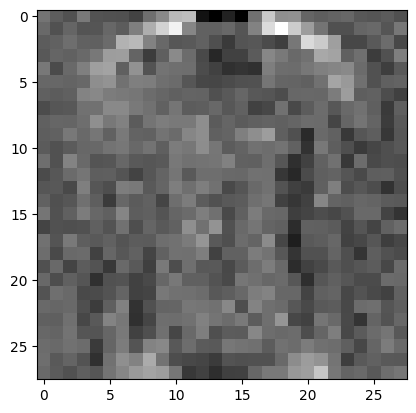

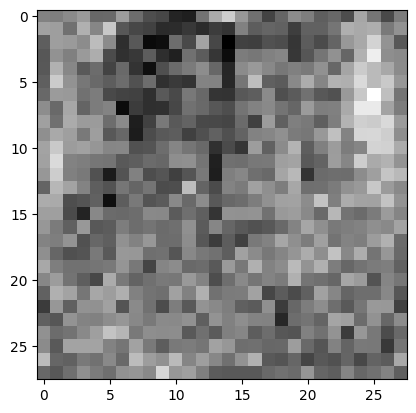

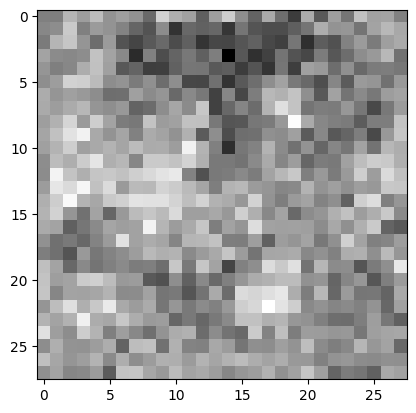

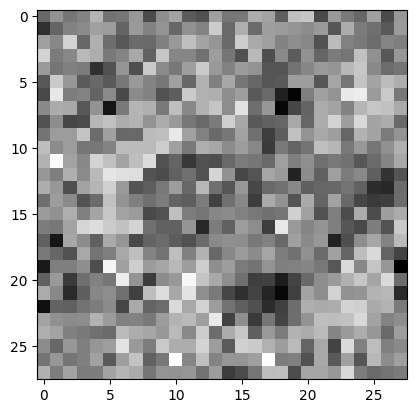

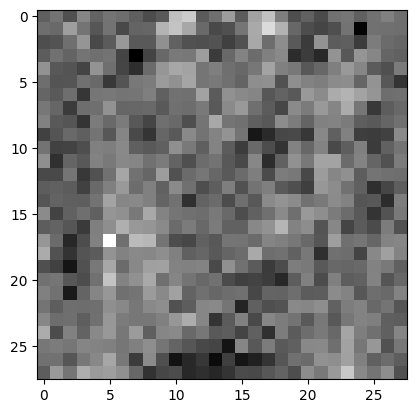

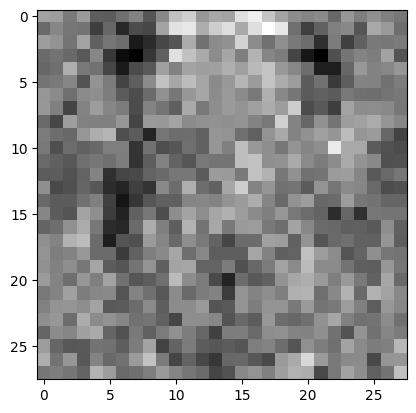

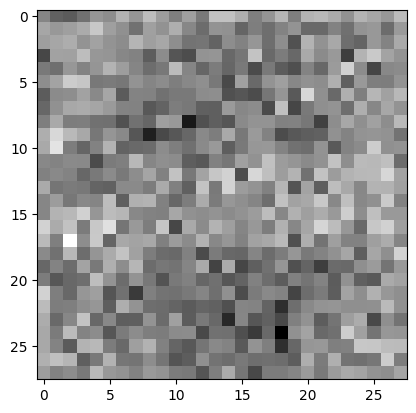

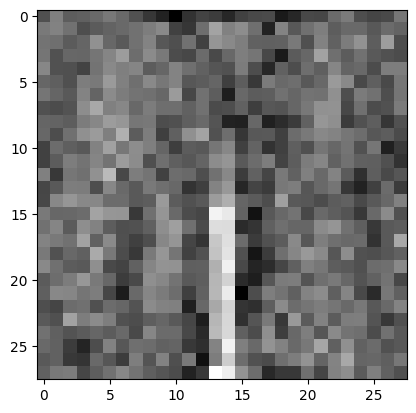

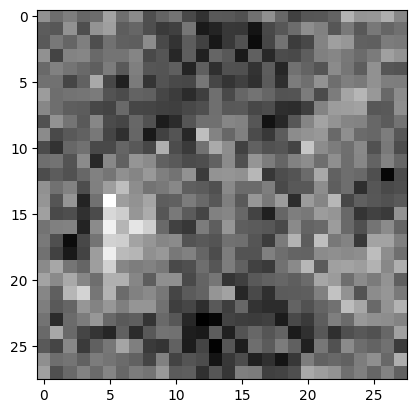

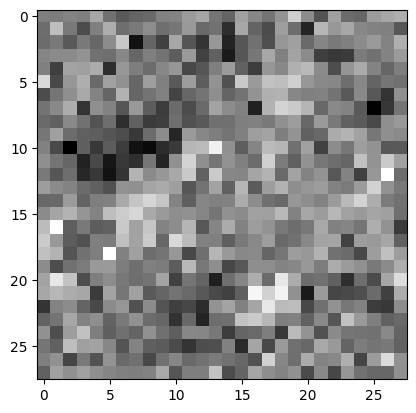

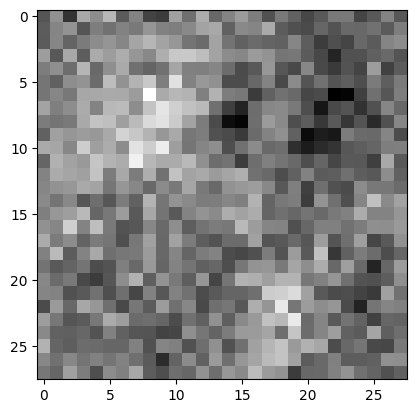

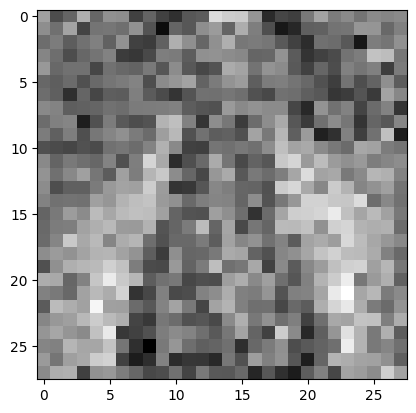

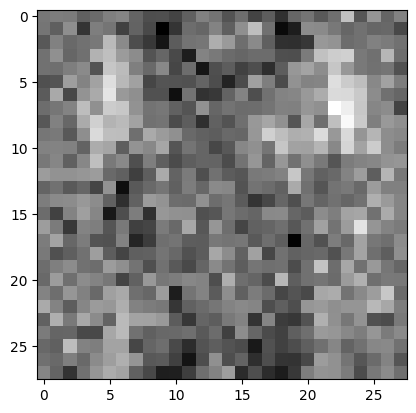

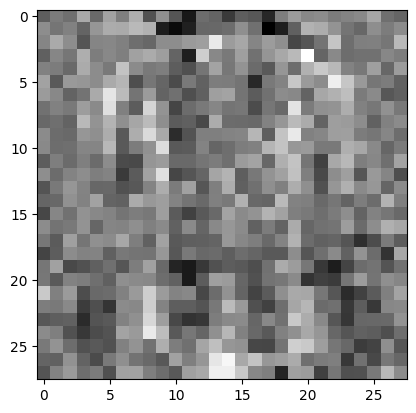

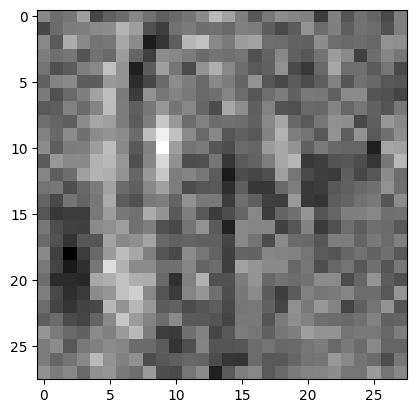

In [26]:
print(melhor_modelo.testeModelo(test_images_flat, test_labels))
melhor_modelo.verCamadaHidden()
